<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <a href="https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv">https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv</a>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lat,lon) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('yellow_tripdata_2016-01.csv')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,2.0,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,1.0,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,1.0,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,2.0,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,2.0,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19160 entries, 0 to 19159
Data columns (total 19 columns):
VendorID                 19160 non-null int64
tpep_pickup_datetime     19160 non-null object
tpep_dropoff_datetime    19160 non-null object
passenger_count          19160 non-null int64
trip_distance            19160 non-null float64
pickup_longitude         19160 non-null float64
pickup_latitude          19159 non-null float64
RatecodeID               19159 non-null float64
store_and_fwd_flag       19159 non-null object
dropoff_longitude        19159 non-null float64
dropoff_latitude         19159 non-null float64
payment_type             19159 non-null float64
fare_amount              19159 non-null float64
extra                    19159 non-null float64
mta_tax                  19159 non-null float64
tip_amount               19159 non-null float64
tolls_amount             19159 non-null float64
improvement_surcharge    19159 non-null float64
total_amount             19159 non

<h2>Remove data outside the bounding box</h2>


In [3]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
# pickup
df = df[(df['pickup_longitude']<eastlimit) & (df['pickup_longitude']>westlimit)]
df = df[(df['pickup_latitude']>southlimit) & (df['pickup_latitude']<northlimit)]
# drop off
df = df[(df['dropoff_longitude']<eastlimit) & (df['dropoff_longitude']>westlimit)]
df = df[(df['dropoff_latitude']>southlimit) & (df['dropoff_latitude']<northlimit)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18813 entries, 0 to 19158
Data columns (total 19 columns):
VendorID                 18813 non-null int64
tpep_pickup_datetime     18813 non-null object
tpep_dropoff_datetime    18813 non-null object
passenger_count          18813 non-null int64
trip_distance            18813 non-null float64
pickup_longitude         18813 non-null float64
pickup_latitude          18813 non-null float64
RatecodeID               18813 non-null float64
store_and_fwd_flag       18813 non-null object
dropoff_longitude        18813 non-null float64
dropoff_latitude         18813 non-null float64
payment_type             18813 non-null float64
fare_amount              18813 non-null float64
extra                    18813 non-null float64
mta_tax                  18813 non-null float64
tip_amount               18813 non-null float64
tolls_amount             18813 non-null float64
improvement_surcharge    18813 non-null float64
total_amount             18813 non

<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [4]:
import datetime
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,2.0,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,1.0,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,1.0,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,2.0,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,2.0,8.0,0.0,0.5,0.0,0.0,0.3,8.8


<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [5]:
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration']/ np.timedelta64(1,'s')
df['duration'].mean()

853.5763567745707

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [6]:
df = df[df['duration'] < 10000]
df['duration'].mean()

629.6885359484091

<h2>Plot duration and compare with a gamma distribution</h2>

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


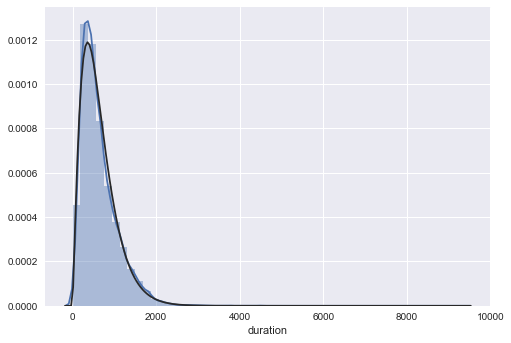

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy import stats
sns.distplot(df['duration'],kde=True,fit=stats.gamma)

<h2>Plot the scatter plot between trip_distance and duration</h2>

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


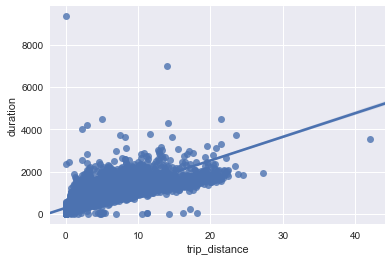

In [8]:
sns.regplot(x=df['trip_distance'], 
               y=df['duration'], 
               fit_reg=True)

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [9]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(lambda x: x.isoweekday())

<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [10]:
df['pickup_hour'] = df['tpep_pickup_datetime'].apply(lambda x: x.hour)

<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

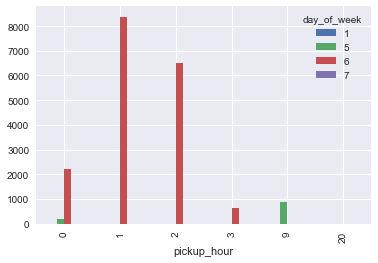

In [11]:
days = df.groupby(['pickup_hour', 'day_of_week']).size().unstack()
days.plot(kind='bar')
# Friday has some pickups in the evening, Saturday after midnight has a large number of pickups

<h2>Create zones</h2>

In [12]:
NYC="""
{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              -73.96285235881805,
              40.808445763052916
            ],
            [
              -73.96262168884277,
              40.80888833658664
            ],
            [
              -73.96364629268645,
              40.80890863805406
            ],
            [
              -73.96421492099762,
              40.80870156279478
            ]
            ]
        ]
        
      },
      "properties": {
        "name": "NYC"  
      }
    }
  ]
}
"""
# import geojsonio
# geojsonio.display(NYC)

In [13]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    zone_table = list()
    lat_dist = eastlimit - westlimit
    lng_dist = northlimit - southlimit
    width = lat_dist / zone_factor
    height = lng_dist / zone_factor
    
    # i is lat, j is lng
    for i in range(zone_factor):
        for j in range(zone_factor):
            zone_code = []
            zone_coords = []
            
            nw = [northlimit - (j*height), westlimit + (i*width)] 
            ne = [northlimit - (j*height), westlimit + ((i+1)*width)]
            se = [northlimit - ((j+1)*height), westlimit + ((i+1)*width)]
            sw = [northlimit - ((j+1)*height), westlimit + (i*width)]
            
            zone_code = str(i)+str(j) #I'm labeling the grid this way because it makes more sense
            zone_coords = [nw, ne, se, sw, nw]
            
            zone_table.append((zone_code, zone_coords))           
    
    return zone_table

In [14]:
zone_table = createZoneTable(4)
for i in zone_table:
    print(str(i[1]) + ',')

[[40.9596, -74.2635], [40.9596, -74.135775], [40.8411, -74.135775], [40.8411, -74.2635], [40.9596, -74.2635]],
[[40.8411, -74.2635], [40.8411, -74.135775], [40.7226, -74.135775], [40.7226, -74.2635], [40.8411, -74.2635]],
[[40.7226, -74.2635], [40.7226, -74.135775], [40.6041, -74.135775], [40.6041, -74.2635], [40.7226, -74.2635]],
[[40.6041, -74.2635], [40.6041, -74.135775], [40.4856, -74.135775], [40.4856, -74.2635], [40.6041, -74.2635]],
[[40.9596, -74.135775], [40.9596, -74.00805], [40.8411, -74.00805], [40.8411, -74.135775], [40.9596, -74.135775]],
[[40.8411, -74.135775], [40.8411, -74.00805], [40.7226, -74.00805], [40.7226, -74.135775], [40.8411, -74.135775]],
[[40.7226, -74.135775], [40.7226, -74.00805], [40.6041, -74.00805], [40.6041, -74.135775], [40.7226, -74.135775]],
[[40.6041, -74.135775], [40.6041, -74.00805], [40.4856, -74.00805], [40.4856, -74.135775], [40.6041, -74.135775]],
[[40.9596, -74.00805], [40.9596, -73.880325], [40.8411, -73.880325], [40.8411, -74.00805], [40.9

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [15]:
def createGeoJsonObject(zone_table):
    zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    for i in zone_table:
        zone_data_dict_features.append('''
        {
          "type": "Feature",
          "geometry": {
            "type": "Polygon",
            "coordinates":[ '''
             + i[1] +
            '''
            ],
            "properties": {
        "name":''' + i[0] +
            '''                 
            }   
          }
        }
            '''   )
    return zone_data_dict

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [16]:
zone_table = createZoneTable(20,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
print(zone_table[:4])

[('00', [[40.9596, -74.2635], [40.9596, -74.237955], [40.935900000000004, -74.237955], [40.935900000000004, -74.2635], [40.9596, -74.2635]]), ('01', [[40.935900000000004, -74.2635], [40.935900000000004, -74.237955], [40.9122, -74.237955], [40.9122, -74.2635], [40.935900000000004, -74.2635]]), ('02', [[40.9122, -74.2635], [40.9122, -74.237955], [40.8885, -74.237955], [40.8885, -74.2635], [40.9122, -74.2635]]), ('03', [[40.8885, -74.2635], [40.8885, -74.237955], [40.8648, -74.237955], [40.8648, -74.2635], [40.8885, -74.2635]])]


<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(40.65,-74.19)</span> the function should return "31"

In [17]:
for i in zone_table:
    print(i[1][1])
    # i[1][0][1]

[40.9596, -74.237955]
[40.935900000000004, -74.237955]
[40.9122, -74.237955]
[40.8885, -74.237955]
[40.8648, -74.237955]
[40.8411, -74.237955]
[40.8174, -74.237955]
[40.7937, -74.237955]
[40.77, -74.237955]
[40.7463, -74.237955]
[40.7226, -74.237955]
[40.6989, -74.237955]
[40.6752, -74.237955]
[40.6515, -74.237955]
[40.6278, -74.237955]
[40.6041, -74.237955]
[40.5804, -74.237955]
[40.5567, -74.237955]
[40.533, -74.237955]
[40.509299999999996, -74.237955]
[40.9596, -74.21240999999999]
[40.935900000000004, -74.21240999999999]
[40.9122, -74.21240999999999]
[40.8885, -74.21240999999999]
[40.8648, -74.21240999999999]
[40.8411, -74.21240999999999]
[40.8174, -74.21240999999999]
[40.7937, -74.21240999999999]
[40.77, -74.21240999999999]
[40.7463, -74.21240999999999]
[40.7226, -74.21240999999999]
[40.6989, -74.21240999999999]
[40.6752, -74.21240999999999]
[40.6515, -74.21240999999999]
[40.6278, -74.21240999999999]
[40.6041, -74.21240999999999]
[40.5804, -74.21240999999999]
[40.5567, -74.21240999

In [18]:
def get_zone(lat,lng,zone_table=zone_table):
    for i in zone_table:
        if lng < i[1][0][1] and lat < i[1][3][0]:
            zone = str(i[0])
    
            return zone
            break
            
get_zone(40.65,-74.19)
# I know the numbers are differnt for the zones, but this still makes sense

'30'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [19]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [20]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_latitude'],x['pickup_longitude']),axis=1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_latitude'],x['dropoff_longitude']),axis=1)


In [21]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour,pickup_zone,dropoff_zone
0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1.0,N,-73.981842,...,0.5,0.0,0.0,0.3,8.8,0.0,5,0,110,120
1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1.0,N,-73.944473,...,0.5,0.0,0.0,0.3,19.3,0.0,5,0,120,130
2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1.0,N,-73.950272,...,0.5,0.0,0.0,0.3,34.3,0.0,5,0,110,130
3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1.0,N,-73.962242,...,0.5,0.0,0.0,0.3,17.3,0.0,5,0,110,120
4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1.0,N,-73.977264,...,0.5,0.0,0.0,0.3,8.8,0.0,5,0,120,120


<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [22]:
import numpy as np

same_zone_pct = str(np.where(df['pickup_zone'] == df['dropoff_zone'], 1, 0).sum() / len(df.index))
highest_pickups = str(df['pickup_zone'].value_counts().max())
highest_dropoffs = str(df['dropoff_zone'].value_counts().max())

print('Same zone Percentage: '+same_zone_pct+', Highest pickups: '+highest_pickups+', Highest Dropoffs: '+highest_dropoffs)

Same zone Percentage: 0.44049459041731065, Highest pickups: 11887, Highest Dropoffs: 7776


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


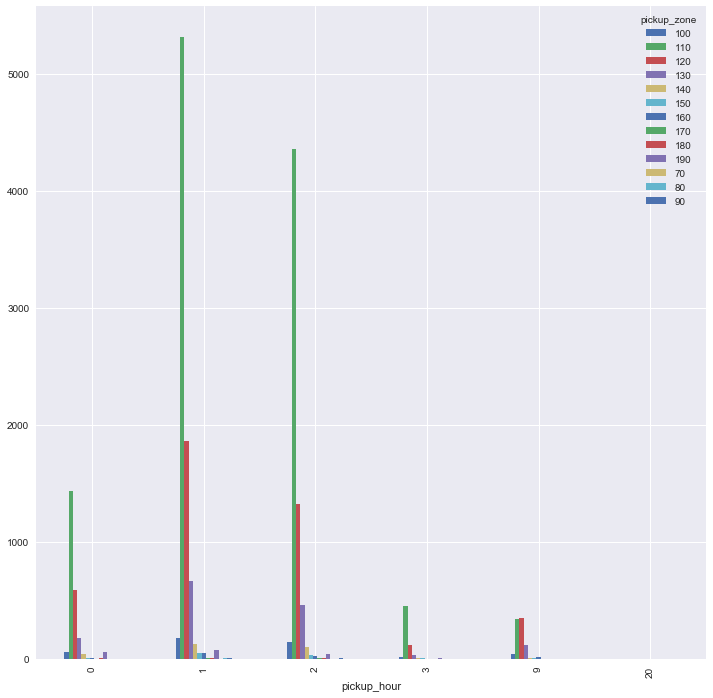

In [23]:
hour_pickup = df.groupby(['pickup_hour', 'pickup_zone'])
hour_pickup.size().unstack().plot(kind='bar',figsize=(12,12))
# needs go get just top five

<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

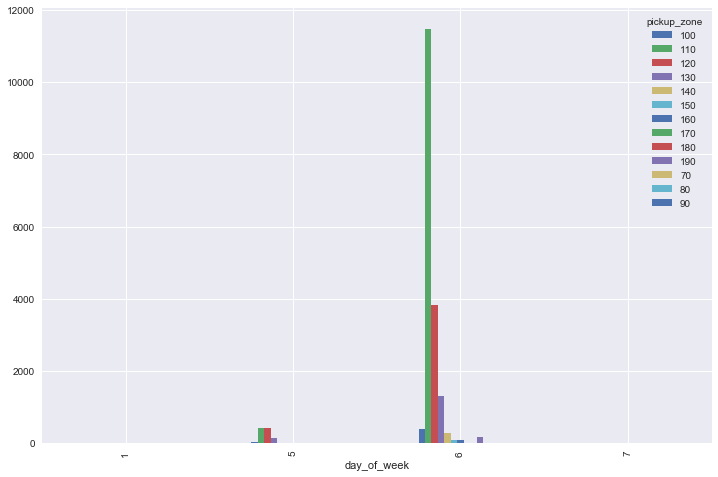

In [30]:
hour_pickup = df.groupby(['day_of_week', 'pickup_zone'])
hour_pickup.size().unstack().plot(kind='bar',figsize=(12,8))

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [31]:
hour_pickup = df.groupby(['day_of_week', 'pickup_zone'])
hour_pickup = df.where(df['pickup_hour'] > 8)
hour_pickup.size().unstack().plot(kind='bar',figsize=(12,12))

TypeError: 'numpy.int32' object is not callable

<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)

In [40]:
import folium
m = folium.Map(location=[40.8075,-73.9626],zoom_start=11)

m.choropleth(geo_data=zone_table, data=df, # downloaded from canvas
             columns=['pickup_zone'], # columns to use from data frame
             key_on='feature.properties.postalCode', # associate Zip with geojson property postalCode
             fill_color='RdYlGn', fill_opacity=0.7, line_opacity=0.8,
             legend_name='Distribution of Incidents')
folium.LayerControl().add_to(m)

IndexError: list index out of range